<a href="https://colab.research.google.com/github/Onehundredpunches/Five-model-in-first-report/blob/main/Predict_fingerprint_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Import library
import pandas as pd
import numpy as np
from os import listdir
from numpy import asanyarray, save
from keras.utils import load_img, img_to_array
from numpy.core.multiarray import asarray
from google.colab import drive
from keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [56]:
folder = '/content/drive/MyDrive/AI Report Photo/Fingerprint_/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Doctor'):
    output = 1.0
  if file.startswith('Worker'):
    output = 2.0
  if file.startswith('Farmer'):
    output = 3.0
  if file.startswith('Teacher'):
    output = 4.0 
  if file.startswith('Baker'):
    output = 5.0
  if file.startswith('Blacksmith'):
    output = 6.0  
  if file.startswith('Engineer'):
    output = 7.0
  if file.startswith('Electrician'):
    output = 8.0
  if file.startswith('Cashier'):
    output = 9.0 
  if file.startswith('Clerk'):
    output = 10.0
  photo = load_img(folder+file, target_size = (50,50))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)

(1000, 50, 50, 3) (1000,)


In [57]:
# Save data 
save('/content/drive/MyDrive/Colaboratory/AI REPORT/printfinger/printfinger_photos.npy', photos)
save('/content/drive/MyDrive/Colaboratory/AI REPORT/printfinger/printfinger_labels.npy', labels)

In [58]:
# Load data
photos = np.load('/content/drive/MyDrive/Colaboratory/AI REPORT/printfinger/printfinger_photos.npy')
labels = np.load('/content/drive/MyDrive/Colaboratory/AI REPORT/printfinger/printfinger_labels.npy')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, test_size=0.2, random_state=3)

In [60]:
X_train.shape

(800, 50, 50, 3)

In [61]:
y_train.shape

(800,)

In [62]:
X_test.shape

(200, 50, 50, 3)

In [63]:
y_test.shape

(200,)

In [64]:
# Standardized data
X_train = X_train.astype('float32')/255
y_train = to_categorical(y_train, 11) 

X_test = X_test.astype('float32')/255
y_test = to_categorical(y_test, 11)

In [65]:
y_train.shape

(800, 11)

In [66]:
y_test.shape

(200, 11)

In [68]:
# Import library
from keras.layers.attention.multi_head_attention import activation
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, normalization, LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [69]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(50, 50, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(11, activation='softmax'))

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 50, 50, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 25, 25, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                 

In [73]:
# Compile and Train model
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])
train = model.fit(X_train, y_train, batch_size = 60, epochs = 10, verbose = 1)

Epoch 1/10
14/14 [==============================] - 5s 321ms/step - loss: 0.4269 - accuracy: 0.8988
Epoch 2/10
14/14 [==============================] - 6s 443ms/step - loss: 0.1421 - accuracy: 0.9750
Epoch 3/10
14/14 [==============================] - 5s 334ms/step - loss: 0.0455 - accuracy: 0.9962
Epoch 4/10
14/14 [==============================] - 4s 314ms/step - loss: 0.0170 - accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 7s 476ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 4s 316ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 4s 316ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 8/10
14/14 [==============================] - 7s 477ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 9/10
14/14 [==============================] - 4s 318ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 10/10
14/14 [==============================] - 4s 315ms/step - loss: 0.0021 - accuracy: 1.0000

In [74]:
# Save model
model.save('/content/drive/MyDrive/Colaboratory/AI REPORT/printfinger/Predict_printfinger_Model.h5')

Test loss:  5.6389241218566895
Test accuracy 0.1850000023841858


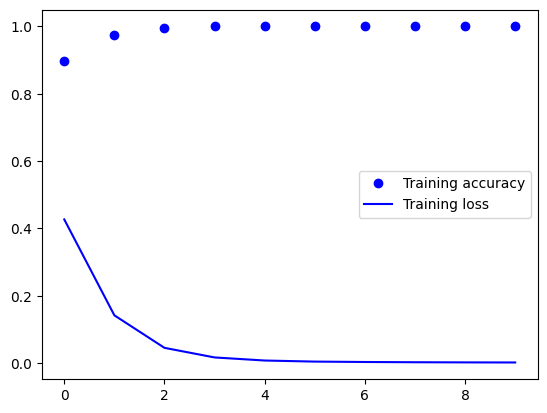

In [75]:
test = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', test[0])
print('Test accuracy', test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.legend()
plt.show()

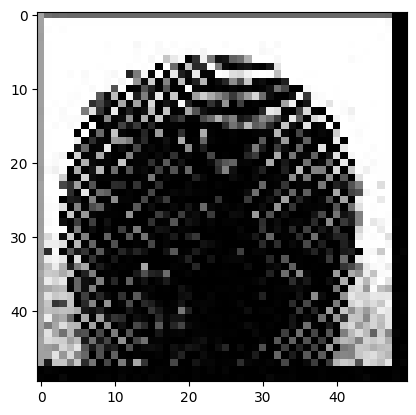

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [76]:
# Use testmodel to evalute trainmodel

# Load photo in testmodel
img = X_test[20]
plt.imshow(img)
plt.show()
print(y_test[20])

In [78]:
X_pred = X_test[20].reshape(1,50,50,3)
X_pred=X_pred.astype('float32')/255
np.argmax(model.predict(X_pred), axis=-1)

1/1 [==============================] - 0s 323ms/step


array([1])

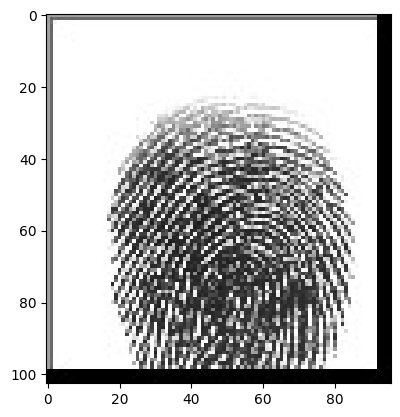

In [79]:
# #IMPORT A PICTURE FOR MODEL PREDICT
url = '/content/Baker (39).jpg'
img = plt.imread(url) 
plt.imshow(img)
plt.show()

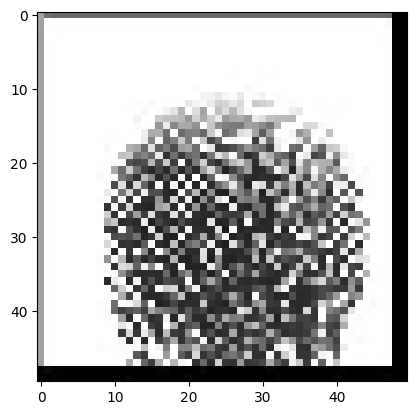

In [80]:
img = load_img(url, target_size = (50,50,3))
plt.imshow(img)

In [81]:
img = img_to_array(img)
img = img.reshape(1,50,50,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 241ms/step


array([5])